# Advance SQL in Data Analysis

In [1]:
import pymysql
import os
from dotenv import load_dotenv

# Load environment variables from .credential file
load_dotenv("../w7/.credential")

# Get credentials from environment variables
conn = pymysql.connect(
    host=os.getenv("DB_HOST"),
    user=os.getenv("DB_USER"),
    password=os.getenv("DB_PASSWORD")
)
cursor = conn.cursor()


In [2]:
cursor.execute("CREATE DATABASE IF NOT EXISTS w10db;")
cursor.execute("USE w10db;")


# 1. Tạo bảng Clients
cursor.execute("""
CREATE TABLE IF NOT EXISTS Clients (
    client_id INT PRIMARY KEY,
    name VARCHAR(255),
    address VARCHAR(255),
    city VARCHAR(255),
    state CHAR(2),
    phone VARCHAR(20)
);
""")

# 2. Tạo bảng Invoices
cursor.execute("""
CREATE TABLE IF NOT EXISTS Invoices (
    invoice_id INT PRIMARY KEY,
    number VARCHAR(50),
    client_id INT,
    invoice_total DECIMAL(10, 2),
    payment_total DECIMAL(10, 2),
    invoice_date DATE,
    due_date DATE,
    payment_date DATE,
    FOREIGN KEY (client_id) REFERENCES Clients(client_id)
);
""")

# 3. Chèn dữ liệu vào bảng Clients
cursor.execute("""
INSERT INTO Clients (client_id, name, address, city, state, phone) VALUES
(1, 'Vinte', '3 Nevada Parkway', 'Syracuse', 'NY', '315-252-7305'),
(2, 'Myworks', '34267 Glendale Parkway', 'Huntington', 'WV', '304-659-1170'),
(3, 'Yadel', '096 Pawling Parkway', 'San Francisco', 'CA', '415-144-6037'),
(4, 'Kwideo', '81674 Westerfield Circle', 'Waco', 'TX', '254-750-0784'),
(5, 'Topiclounge', '0863 Farmco Road', 'Portland', 'OR', '971-888-9129');
""")

# 4. Chèn dữ liệu vào bảng Invoices
cursor.execute("""
INSERT INTO Invoices (invoice_id, number, client_id, invoice_total, payment_total, invoice_date, due_date, payment_date) VALUES
(1, '91-953-3396', 2, 101.79, 0.00, '2019-03-09', '2019-03-29', NULL),
(2, '03-898-6735', 5, 175.32, 8.18, '2019-06-11', '2019-07-01', '2019-02-12'),
(3, '20-228-0335', 5, 147.99, 0.00, '2019-07-05', '2019-07-25', NULL),
(4, '96-934-0748', 3, 152.21, 0.00, '2019-03-08', '2019-03-28', NULL),
(5, '87-052-3121', 5, 169.36, 0.00, '2019-07-18', '2019-08-07', NULL),
(6, '57-562-6621', 1, 157.78, 74.55, '2019-06-19', '2019-07-09', '2019-01-03'),
(7, '68-093-9863', 3, 133.87, 0.00, '2019-09-04', '2019-09-24', NULL),
(8, '78-145-1093', 1, 189.12, 0.00, '2019-04-25', '2019-05-15', NULL),
(9, '77-593-0081', 5, 172.17, 0.00, '2019-07-09', '2019-07-29', NULL),
(10, '48-266-1517', 1, 159.50, 0.00, '2019-07-02', '2019-07-22', NULL),
(11, '20-848-0181', 3, 126.15, 0.03, '2019-06-05', '2019-06-25', '2019-01-11'),
(13, '30-615-9605', 5, 135.01, 87.44, '2019-01-25', '2019-02-14', '2019-01-26'),
(15, '33-615-4694', 3, 167.29, 80.31, '2019-07-09', '2019-07-29', '2019-01-15'),
(16, '52-269-9803', 1, 167.02, 0.00, '2019-01-01', '2019-01-21', NULL),
(17, '83-559-4105', 3, 126.38, 68.10, '2019-11-23', '2019-12-13', '2019-01-15'),
(18, '33-626-9880', 5, 180.17, 42.77, '2019-03-03', '2019-03-23', '2019-01-08'),
(19, '29-515-4535', 1, 134.47, 0.00, '2019-04-15', '2019-05-05', NULL);
""")

# Commit the changes
conn.commit()

## CTE (Common Table Expression)
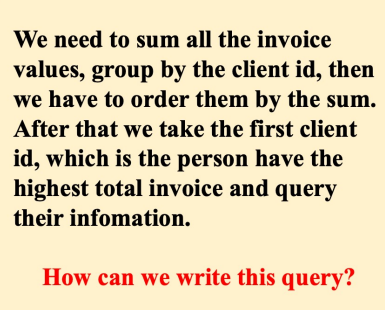

In [5]:
# Find the client with the highest total invoice amount

cursor.execute("""
SELECT c.name, i.client_id, sum(i.invoice_total) 
    AS total_invoice
FROM clients c
INNER JOIN invoices i
    ON c.client_id = i.client_id
GROUP BY i.client_id
ORDER BY total_invoice DESC
LIMIT 1;
""")

data = cursor.fetchall()
print(data)

(('Topiclounge', 5, Decimal('980.02')),)


- Another solution is to use CTE, where we first query what we want and using it for our main query

In [7]:
# Find the client with the highest total invoice amount using CTE

cursor.execute("""
WITH invoice_amount AS(
    SELECT client_id, SUM(invoice_total) AS invoice_amount
    FROM invoices
    GROUP BY client_id
    ORDER BY SUM(invoice_total) DESC
    LIMIT 1
)
SELECT c.client_id, c.name, i.invoice_amount
FROM clients c JOIN invoice_amount i
USING (client_id);
""")

data = cursor.fetchall()
print(data)

((5, 'Topiclounge', Decimal('980.02')),)


In [8]:
# Close Connection
cursor.close()
conn.close()